In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('matches.csv') # Reading matches.csv file
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [22]:
#Q1
teams = pd.concat([df['team1'], df['team2']]).unique() # Concatenating the 'team1' and 'team2' columns into a single Series,
#removing NaN values, and extracting unique team names

print(f"Teams are {teams}") # Printing the team names in a formatted string


Unique Teams are ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


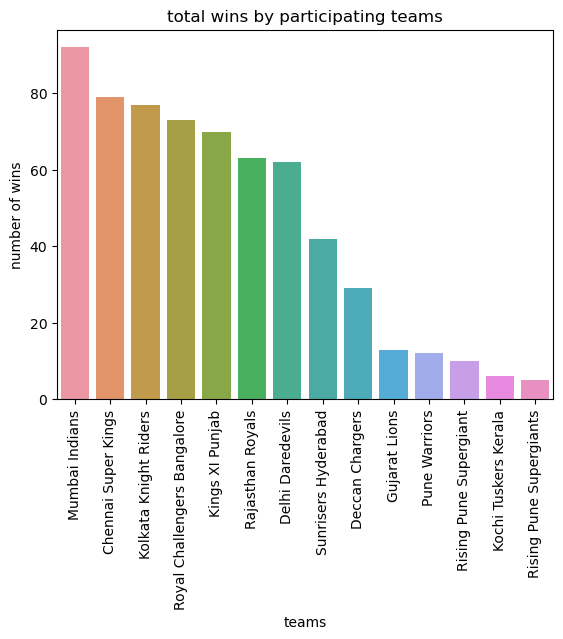

In [23]:
#Q2
sns.barplot(x=df['winner'].value_counts().index, y=df['winner'].value_counts().values)
plt.title('total wins by participating teams')
plt.xlabel('teams')
plt.xticks(rotation=90)
plt.ylabel('number of wins')
plt.show()

In [24]:
#Q3
ump_count = df['umpire3'].value_counts()
print(ump_count)

Series([], Name: umpire3, dtype: int64)


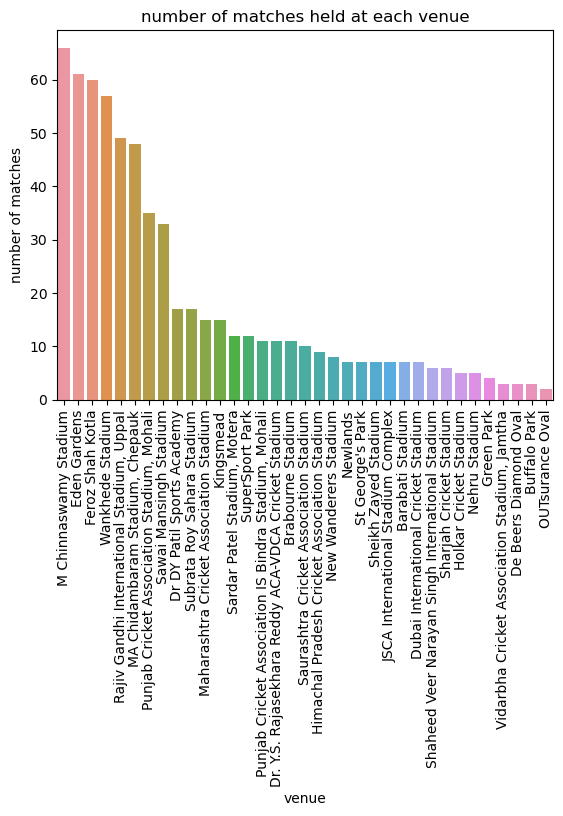

In [25]:
#Q4
sns.barplot(x=df['venue'].value_counts().index,y=df['venue'].value_counts().values)
plt.title('number of matches held at each venue')
plt.xlabel('venue')
plt.ylabel('number of matches')
plt.xticks(rotation=90)
plt.show()

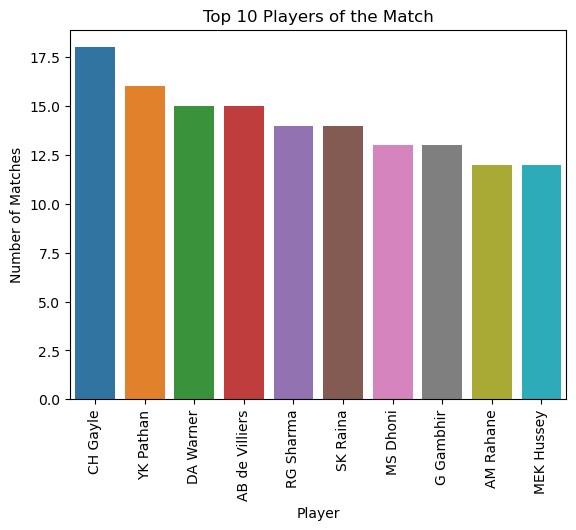

In [26]:
#Q5
sns.barplot(x=df['player_of_match'].value_counts().head(10).index,y=df['player_of_match'].value_counts().head(10).values)
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

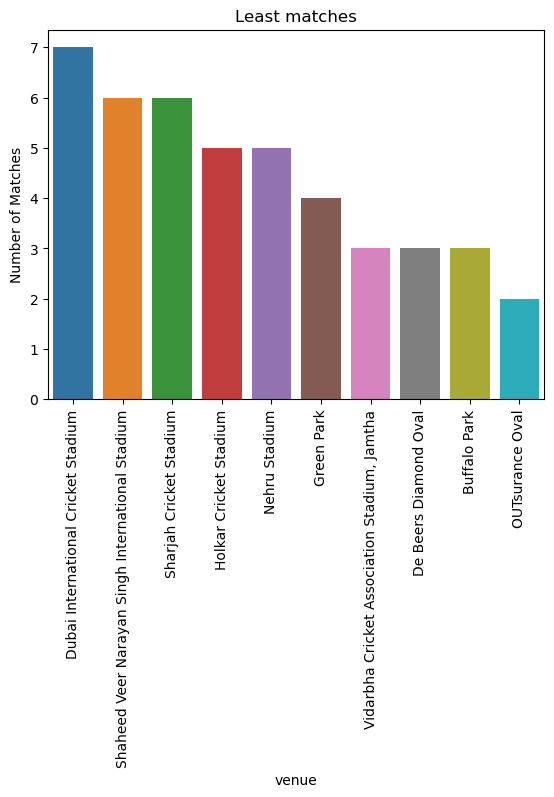

In [27]:
#Q6
sns.barplot(x=df['venue'].value_counts().tail(10).index,y=df['venue'].value_counts().tail(10).values)
plt.title('Least matches')
plt.xlabel('venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

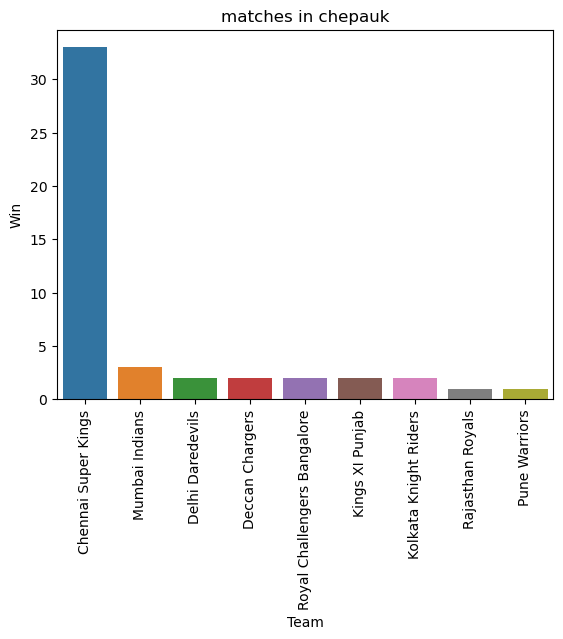

In [28]:
#Q7
chepauk_matches = df[df['venue'] == 'MA Chidambaram Stadium, Chepauk']
sns.barplot(x=chepauk_matches['winner'].value_counts().index, y=chepauk_matches['winner'].value_counts().values)
plt.xlabel('Team')
plt.ylabel('Win')
plt.title('matches in chepauk')
plt.xticks(rotation=90)
plt.show

In [29]:
#Q8
tied = df.loc[df['result']=='tie',"venue"]
tied.index+=1
print(tied)

34        Saurashtra Cricket Association Stadium
126                                     Newlands
190              MA Chidambaram Stadium, Chepauk
388    Rajiv Gandhi International Stadium, Uppal
401                        M Chinnaswamy Stadium
476                         Sheikh Zayed Stadium
536                 Sardar Patel Stadium, Motera
Name: venue, dtype: object


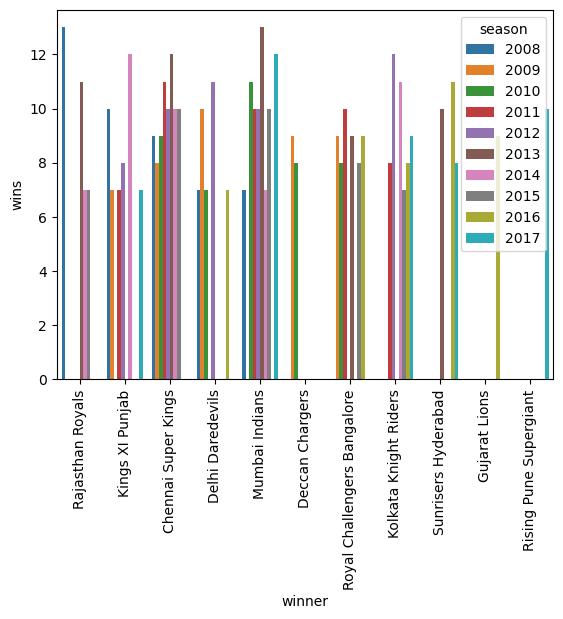

In [30]:
#Q9
top_teams = df.groupby(['season', 'winner']).size().reset_index(name='wins')
top_teams = top_teams.groupby('season').apply(lambda x: x.nlargest(5, 'wins')).reset_index(drop=True)
sns.barplot(x='winner', y='wins', hue='season', data=top_teams)
plt.xticks(rotation=90)
plt.show()

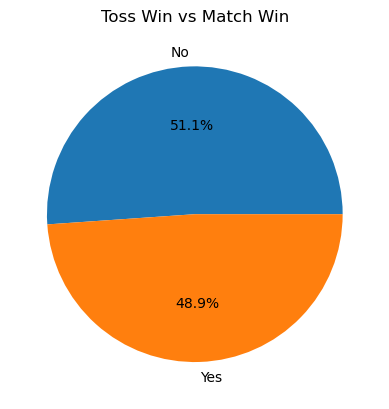

In [31]:
#Q10
df['toss_won'] = df['toss_winner'] == df['winner']
toss_win_count = df['toss_won'].value_counts()
plt.pie(toss_win_count, labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Toss Win vs Match Win')
plt.show()
